In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# import the necessary modelling algos.

#classification.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
import xgboost as xg

#model selection
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import hyperopt as hpt
from catboost import cv,Pool

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
os.chdir("C:\\Users\\kiran\\Desktop\\python practice\\bike rental")

In [3]:
bike_df=pd.read_csv('day.csv')
bike_df_copy=bike_df.copy()

In [4]:
print(bike_df.shape)
bike_df.head(5)

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### short description of features
- instant: Record index
- dteday: Date
- season: Season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: Year (0: 2011, 1:2012)
- mnth: Month (1 to 12)
- holiday: weather day is holiday or not (extracted from Holiday Schedule)
- weekday: Day of the week
- workingday: If day is neither weekend nor holiday it's 1, otherwise is 0.
- weathersit: (extracted from Freemeteo)
 1. Clear, Few clouds, Partly cloudy, Partly cloudy
 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
 clouds
 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius. 
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### generate profile report using pandas_profiling 
For each column the following statistics are presented in an interactive HTML report:

- Essentials: type, unique values, missing values
- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
- Most frequent values
- Histogram
- Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes

In [6]:
pp.ProfileReport(bike_df)

Number of variables,16
Number of observations,731
Total Missing (%),0.0%
Total size in memory,91.5 KiB
Average record size in memory,128.1 B
Numeric,10
Categorical,0
Boolean,3
Date,0
Text (Unique),1
Rejected,2


In [7]:
# view profile report generated in the saved repository as a html file
pfr = pp.ProfileReport(bike_df)
pfr.to_file("profile.html")

### Missing value analysis

- visualisation of missing values using missingno library
- no missing values were found

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


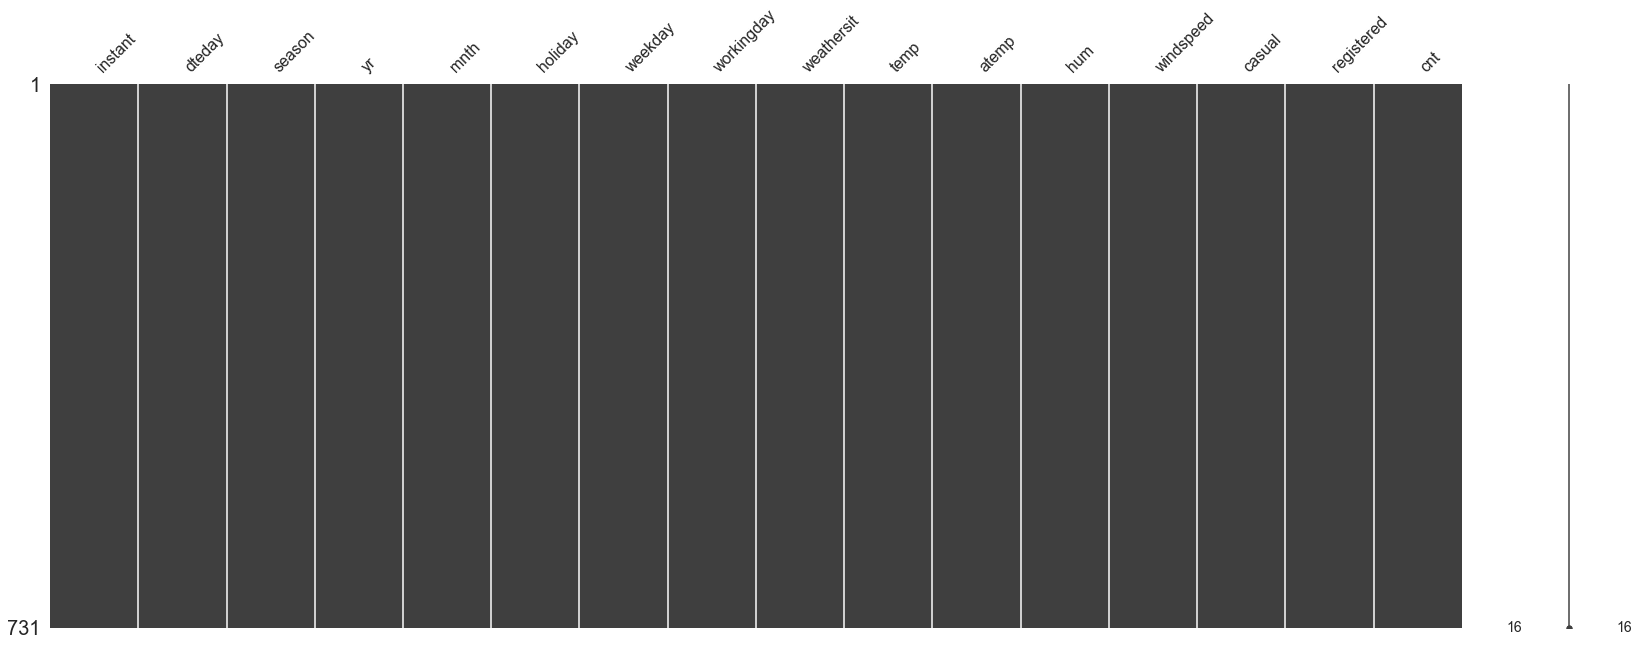

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(bike_df)
#msno.bar(df,log=True)

### Target variable (cnt) distribution
- target variable is normally distributed, no skewness observed.

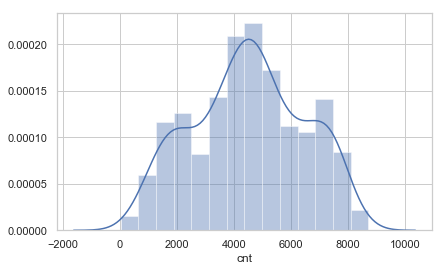

In [8]:
sns.distplot(bike_df["cnt"])

### Exploratory Data Analysis (EDA)

#### Univariate and Bivariate analysis of all Categorical features
- people like to rent bikes more when the sky is clear.
- the count of number of rented bikes is maximum in fall (Autumn) season and least in spring season.
- number of bikes rented per season over the years has increased for both casual and registered users.
- registered users have rented more bikes than casual users overall.
- casual users travel more in weekends as compared to registered users (Saturday / Sunday).
- registered users rent more bikes during working days as expected for commute to work / office.
- demand for bikes are more on working days as compared to holidays ( because majority of the bike users are registered )


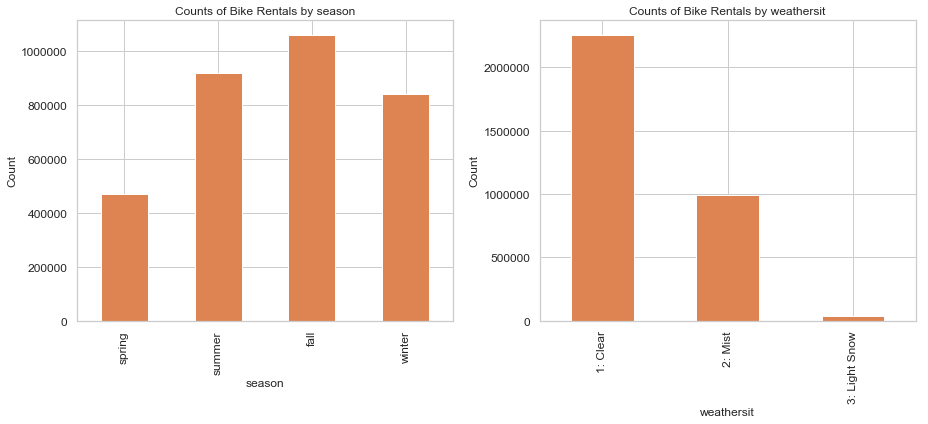

In [9]:
f, (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bike_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','summer','fall','winter'])

 
ax2 = bike_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar', 
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

Text(0.5,1,'Total number of bikes rented on Registered basis per season')

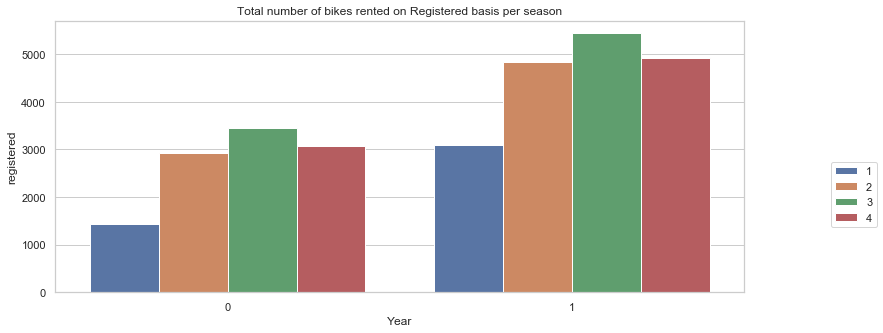

In [10]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=bike_df,palette='deep', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.title('Total number of bikes rented on Registered basis per season')


Text(0.5,1,'Total number of bikes rented on casual basis per season')

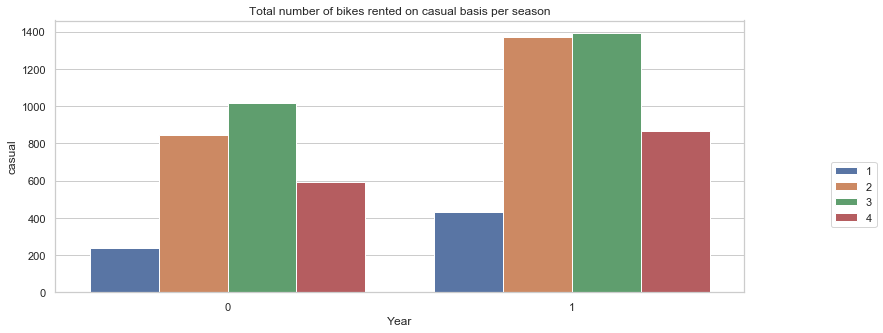

In [11]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=bike_df,palette='deep', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.title('Total number of bikes rented on casual basis per season')


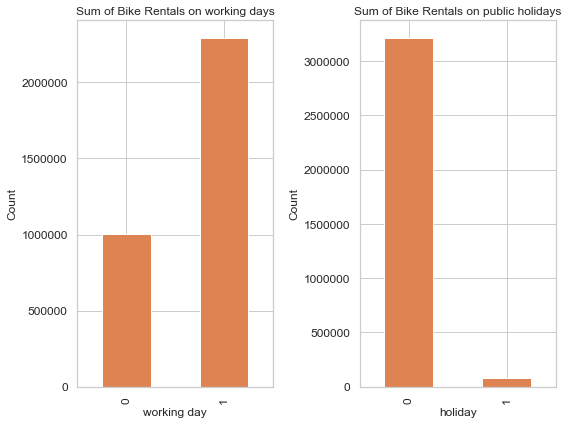

In [12]:
f, (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

ax1 = bike_df[['workingday','cnt']].groupby(['workingday']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Sum of Bike Rentals on working days", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("working day", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

 
ax2 = bike_df[['holiday','cnt']].groupby(['holiday']).sum().reset_index().plot(kind='bar', 
      legend = False, stacked=True, title ="Sum of Bike Rentals on public holidays", fontsize=12, ax=ax2)

ax2.set_xlabel("holiday", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)


f.tight_layout()

####  Analysis on usage of bikes by casual V/S registered users 

In [13]:
# Extracting type of day using dteday and weekday column
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],dayfirst=True)

# Generally, 0-Monday and 6-Sunday in datetime (for weekend: Saturday-5 & Sunday-6)
bike_df['isweekend']=bike_df['dteday'].apply( lambda x :1 if (x.weekday()==5) |(x.weekday()==6) else 0 ) 

b=bike_df[bike_df['isweekend']==1] #dataframe with only weekend dates 

# But in our Dataframe its encoded with Saturday-6 & Sunday-0 (instead of 5,6)
b['weekday'].value_counts() 

6    105
0    105
Name: weekday, dtype: int64

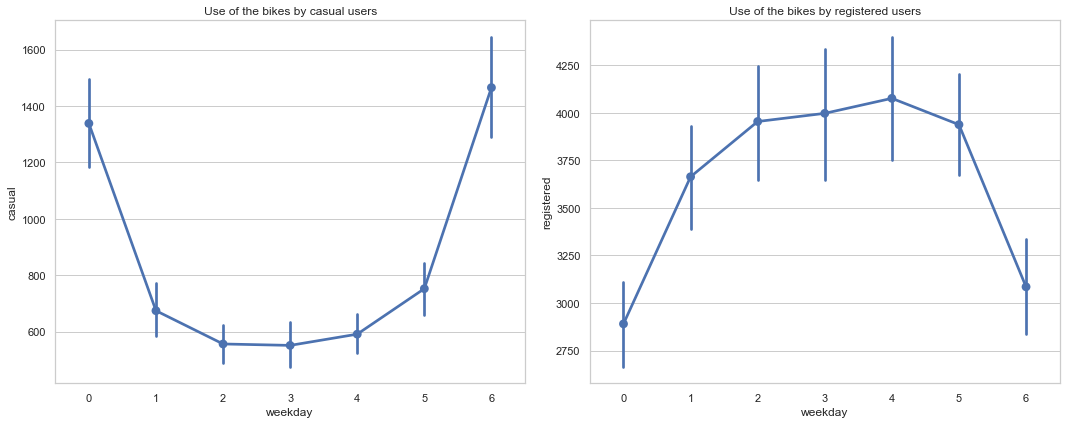

In [14]:
#casual users travel more in weekends as compared to registered users 
f, (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1=sns.pointplot(data=bike_df[['casual','weekday']],
            x='weekday', y='casual', ax=ax1)
ax1.set(title="Use of the bikes by casual users");

ax2=sns.pointplot(data=bike_df[['registered','weekday']],
            x='weekday', y='registered', ax=ax2)
ax2.set(title="Use of the bikes by registered users");

f.tight_layout()

####  Univariate and Bivariate analysis of all continuous features
- Temp, Atemp looks normally distributed.
- windspeed, humidity, temp and atemp are all normalised in the dataset already.
- With increase in temperature, the count of bike rentals increases as shown in reg plot.

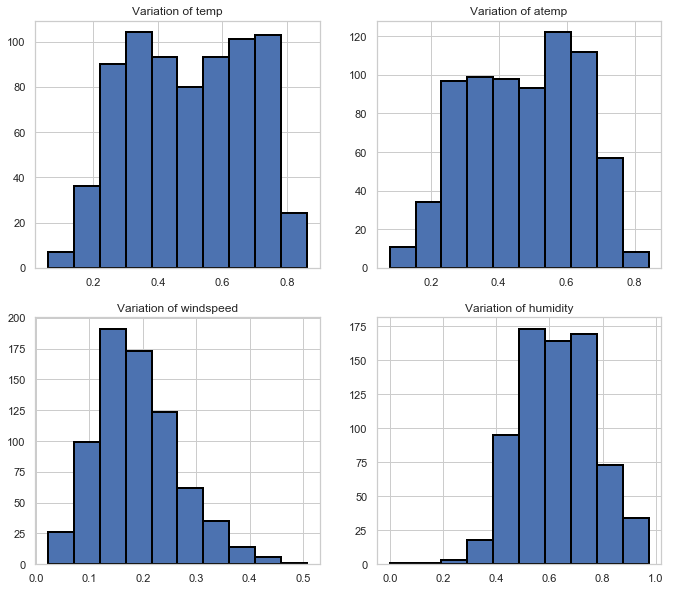

In [15]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=bike_df,edgecolor="black",linewidth=2)
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=bike_df,edgecolor="black",linewidth=2)
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=bike_df,edgecolor="black",linewidth=2)
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=bike_df,edgecolor="black",linewidth=2)
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

####  Regression plot of seaborn used to depict the relationship between continous features and target variable. 
- Here we considered "count" vs "temp", "humidity", "windspeed".
- A +ve correlation with temperature was observed ( sky is clear with increase in temperature )
- A -ve correlation with humidity and windspeed was observed as people avoid travelling when weather is very windy or humid.



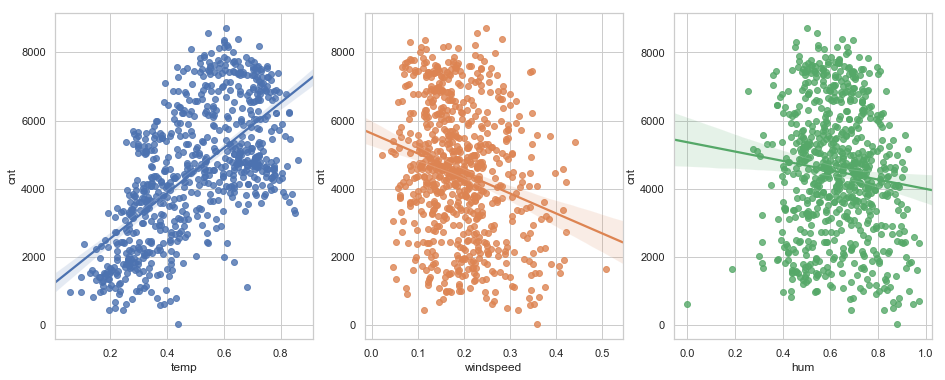

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(14, 6)
sns.regplot(x="temp", y="cnt", data=bike_df,ax=ax1)
sns.regplot(x="windspeed", y="cnt", data=bike_df,ax=ax2)
sns.regplot(x="hum", y="cnt", data=bike_df,ax=ax3)

- A +ve correlation between humidity and temperature was observed (as temp increases the amount of water vapour present in the air also increases)
- A -ve correlation between windspeed with humidity and temperature was observed (as wind increases, it draws heat from the body, thereby temperature and humidity decreases)


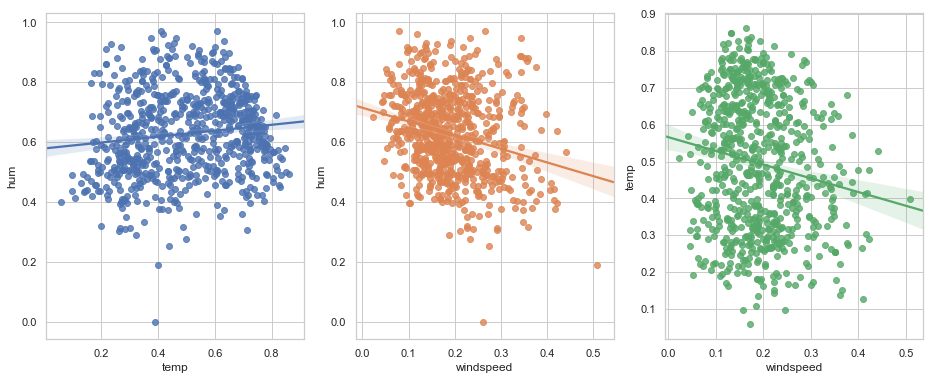

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(14, 6)
sns.regplot(x="temp", y="hum", data=bike_df,ax=ax1)
sns.regplot(x="windspeed", y="hum", data=bike_df,ax=ax2)
sns.regplot(x="windspeed", y="temp", data=bike_df,ax=ax3)

### Correlation Analysis using HeatMap

- temp has got positive correlation with count as people like to travel more when the sky is clear.
- humidity is inversely related to count as expected as when weather is humid people will not like to travel on a bike.
- windspeed is also having a negative correlation with "count".
- "atemp" and "temp" variable has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
- "weathersit" and count are inversely related. This is because for our data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.
- "registered" and count are highly related which indicates that most of the bikes that are rented are registered.
- "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building to avoid bias. (casual + registered = count)
- "instant" variable can also be dropped during model building as it indicates index.


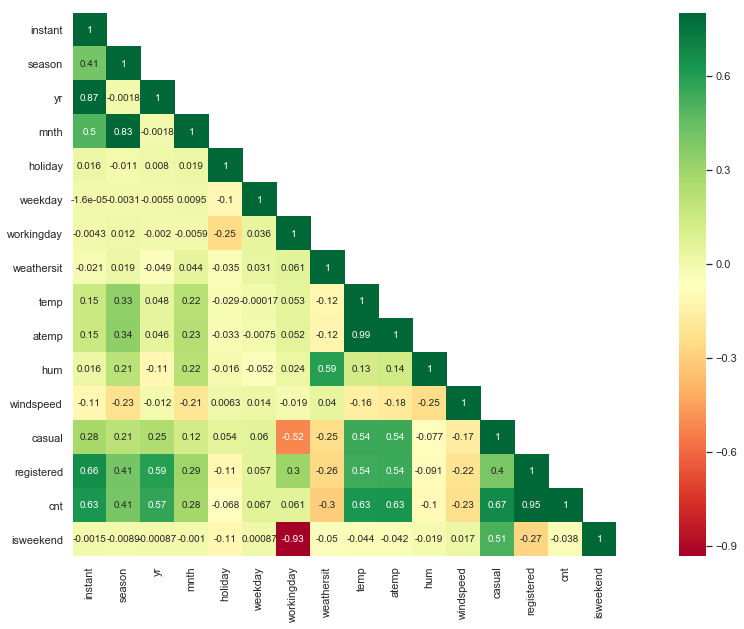

In [18]:
corrMatt = bike_df.corr()
mask = np.array(corrMatt)

mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True,cmap='RdYlGn')

## Outlier Analysis using Box Plots, Pair Plots and PyOD


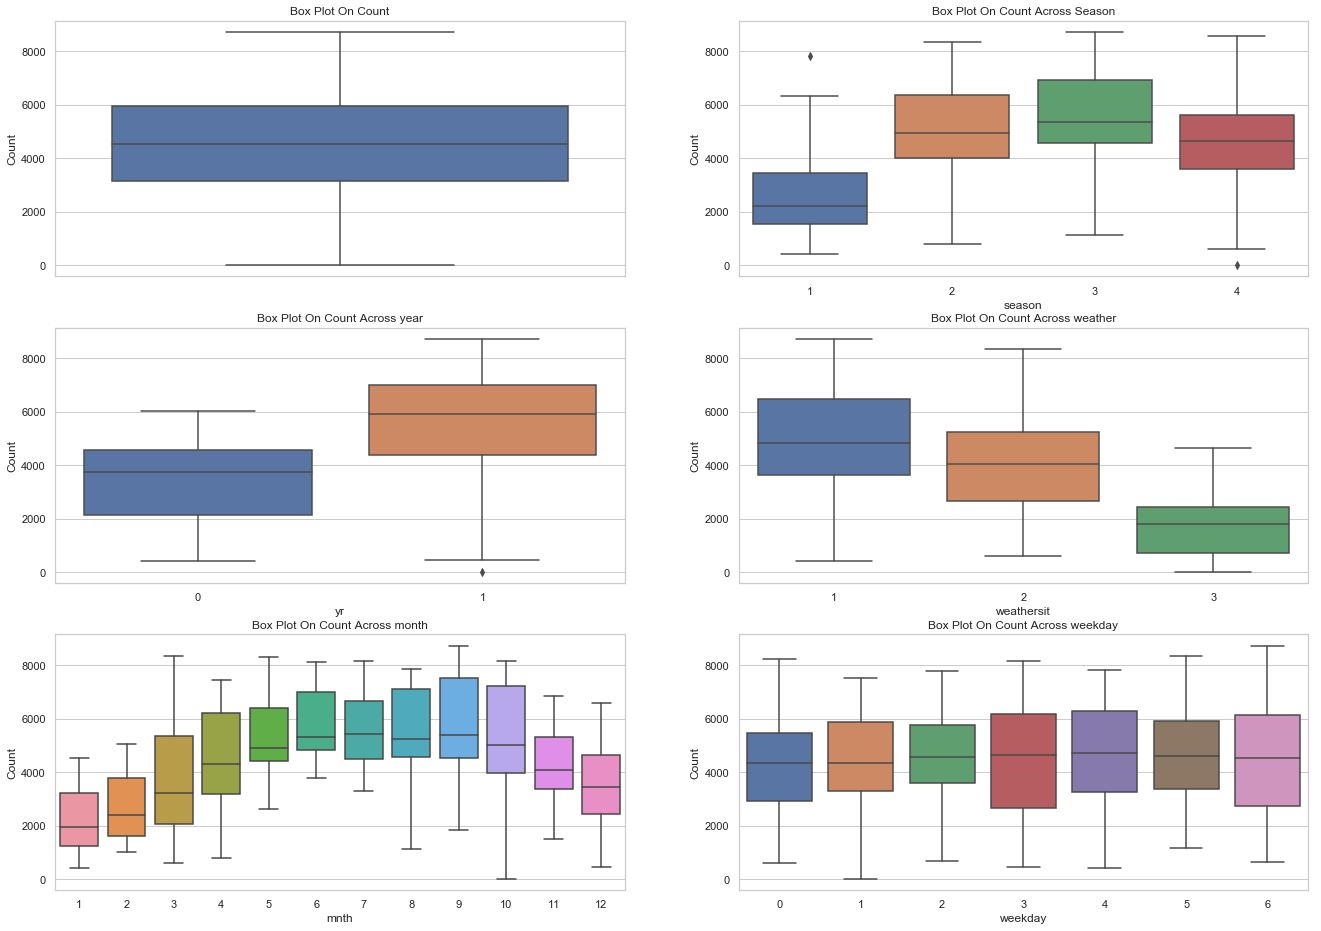

In [19]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 16)
sns.boxplot(data=bike_df,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_df,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=bike_df,y="cnt",x="yr",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_df,y="cnt",x="weathersit",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_df,y="cnt",x="mnth",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_df,y="cnt",x="weekday",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(ylabel='Count',title="Box Plot On Count Across year")
axes[1][1].set(ylabel='Count',title="Box Plot On Count Across weather")
axes[2][0].set(ylabel='Count',title="Box Plot On Count Across month")
axes[2][1].set(ylabel='Count',title="Box Plot On Count Across weekday");

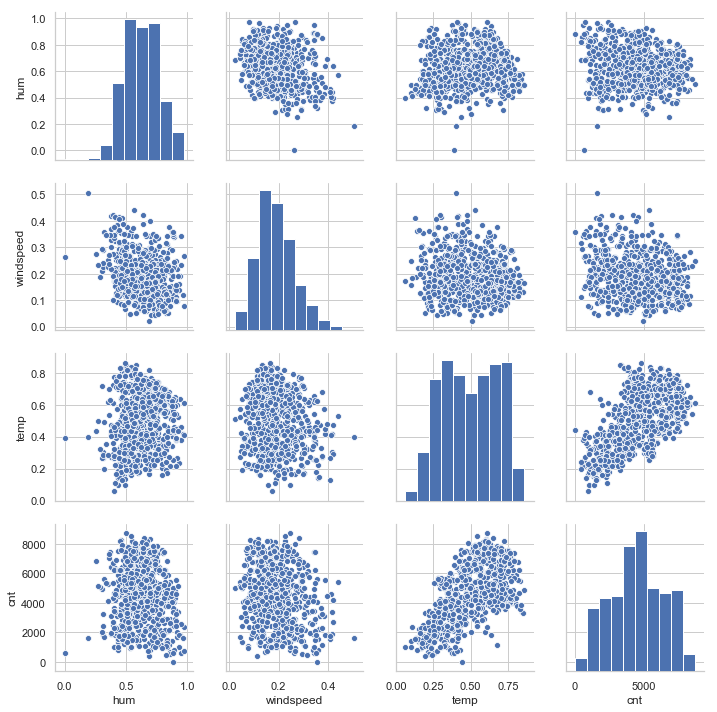

In [20]:
sns.pairplot(data=bike_df[['hum','windspeed','temp','cnt']],palette='hls')

In [21]:
from pyod.models.knn import KNN
from sklearn.preprocessing import MinMaxScaler

#scale down both these features to a range between 0 and 1. This is required to create a explainable visualization 
scaler = MinMaxScaler(feature_range=(0, 1))
bike_df[['cnt']] = scaler.fit_transform(bike_df[['cnt']])
bike_df['cnt'].head(3)

0    0.110792
1    0.089623
2    0.152669
Name: cnt, dtype: float64

In [22]:
X1 = bike_df['hum'].values.reshape(-1,1)
X2 = bike_df['cnt'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [23]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define the outlier detection algorithm
classifiers = {
        'K Nearest Neighbors (KNN)' :  KNN(contamination=outliers_fraction)
}

OUTLIERS : 25 
INLIERS : 706 
Algorithm : K Nearest Neighbors (KNN)


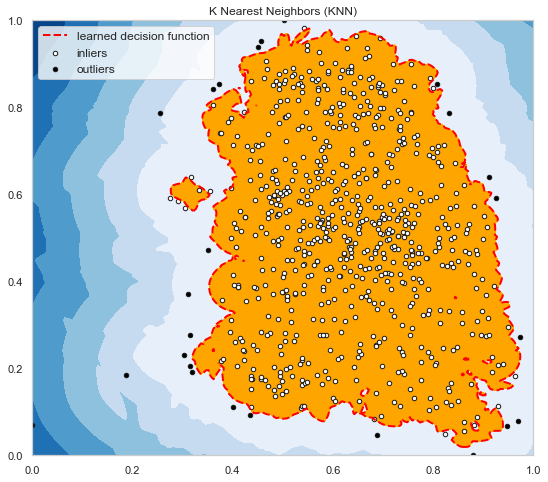

In [24]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

import matplotlib
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(8, 8))
    

    bike_df['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(bike_df['hum'][bike_df['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(bike_df['cnt'][bike_df['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  bike_df['hum'][bike_df['outlier'] == 1].values.reshape(-1,1)
    OX2 =  bike_df['cnt'][bike_df['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS :',n_outliers,'\nINLIERS :',n_inliers,'\nAlgorithm :', clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=12),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

#### In the plot shown above, the white points are inliers surrounded by red lines, and the black points are outliers in the blue zone.

In [25]:
bike_df['cnt']=bike_df['casual']+bike_df['registered']

In [26]:
#outliers in dataframe
bike_df[bike_df['outlier']==1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,isweekend,outlier
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,1,1
21,22,2011-01-22,1,0,1,0,6,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981,1,1
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431,0,1
45,46,2011-02-15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815,0,1
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,1,1
61,62,2011-03-03,1,0,3,0,4,1,1,0.198333,0.200133,0.318333,0.225754,123,1562,1685,0,1
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605,1,1
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623,0,1
86,87,2011-03-28,2,0,3,0,1,1,1,0.264348,0.257574,0.302174,0.212204,222,1806,2028,0,1
87,88,2011-03-29,2,0,3,0,2,1,1,0.302500,0.292908,0.314167,0.226996,317,2108,2425,0,1


In [27]:
#dropping all the outliers present in dataframe
bike_df.drop(bike_df[(bike_df.outlier==1) ].index, inplace=True) 
print(bike_df.shape)

(706, 18)


In [28]:
bike_df = bike_df.drop(["outlier"], axis=1)

## Feature Engineering

In [29]:
categoricalFeatureNames = ["season","holiday","weathersit","weekday","mnth","yr",'isweekend','workingday']
numericalFeatureNames = ["temp","hum","windspeed"]
dropFeatures = ['casual',"dteday","instant","registered","atemp"]
target=['cnt']

In [30]:
bike_df = bike_df.drop(["casual","instant","registered","atemp","dteday"], axis=1)

In [31]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'isweekend'],
      dtype='object')

In [32]:
data_dummy = bike_df.copy()

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = categoricalFeatureNames
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(2)

,temp,hum,windspeed,cnt,season_2,season_3,season_4,holiday_1,weathersit_2,weathersit_3,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1,isweekend_1,workingday_1
0,0.344167,0.805833,0.160446,985,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 730
Data columns (total 30 columns):
temp            706 non-null float64
hum             706 non-null float64
windspeed       706 non-null float64
cnt             706 non-null int64
season_2        706 non-null uint8
season_3        706 non-null uint8
season_4        706 non-null uint8
holiday_1       706 non-null uint8
weathersit_2    706 non-null uint8
weathersit_3    706 non-null uint8
weekday_1       706 non-null uint8
weekday_2       706 non-null uint8
weekday_3       706 non-null uint8
weekday_4       706 non-null uint8
weekday_5       706 non-null uint8
weekday_6       706 non-null uint8
mnth_2          706 non-null uint8
mnth_3          706 non-null uint8
mnth_4          706 non-null uint8
mnth_5          706 non-null uint8
mnth_6          706 non-null uint8
mnth_7          706 non-null uint8
mnth_8          706 non-null uint8
mnth_9          706 non-null uint8
mnth_10         706 non-null uint8
mnth_11       

## Training Data

In [34]:
X=data_dummy.drop(['cnt'],axis=1)
y=data_dummy['cnt'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
linear_models = [LinearRegression(),Ridge(),Lasso()]
for x in linear_models:
    regressor = x

    steps = [('scaler', StandardScaler()),
        ('model', regressor)]

    # Create the pipeline: pipeline
    pipeline = Pipeline(steps)

    # Fit the pipeline to the training set
    reg_scaled = pipeline.fit(X_train,y_train)

    y_pred = reg_scaled.predict(X_test)

    print("R^2: {}".format(reg_scaled.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("RMSE Value For {}: {}".format(x,rmse))
    print("\n")

#RMSE Value For Linear Regression: 721.318
#RMSE Value For Lasso Regression: 720.313
#RMSE Value For Ridge Regression: 721.173

R^2: 0.8382946215816987
RMSE Value For LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): 721.3186897171265


R^2: 0.838359733523556
RMSE Value For Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001): 721.1734527749463


R^2: 0.8387448810393463
RMSE Value For Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False): 720.3137541863048




In [37]:
linear_models = [Ridge(),Lasso()]
for x in linear_models:
    regressor = x

    steps = [('scaler', StandardScaler()),
        ('model', regressor)]

    # Create the pipeline: pipeline
    pipeline = Pipeline(steps)

    # Fit the pipeline to the training set
    reg_scaled = pipeline.fit(X_train,y_train)
    
    parameters_grid = {'model__alpha' : [0.1, 1, 2, 3, 4, 5, 10, 30, 50, 80, 100] }
    grid_cv = GridSearchCV(reg_scaled, parameters_grid, scoring = 'neg_mean_squared_error', cv = 5)
    grid_cv.fit(X_train, y_train)

    y_pred = grid_cv.best_estimator_.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("RMSE Value For best {} Model: {}".format(x,rmse)) 
    print("Best params: ", grid_cv.best_params_)
    print("\n")

#RMSE Value For Tuned Ridge: 720.886
#RMSE Value For Tuned Lasso: 718.466

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE Value For best Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) Model: 720.8860655963258
Best params:  {'model__alpha': 10}




C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE Value For best Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) Model: 718.466462941915
Best params:  {'model__alpha': 5}




In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 42)

steps = [('scaler', StandardScaler()),
        ('model', regressor)]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
reg_scaled = pipeline.fit(X_train,y_train)

y_pred = reg_scaled.predict(X_test)
print ("RMSE Value For Random Forest: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: {}".format(reg_scaled.score(X_test, y_test)))  

#RMSE Value For Random Forest:  711.725

RMSE Value For Random Forest:  711.7257011463871
R^2: 0.8425671372635586


In [40]:
parameters_grid = {
    'model__n_estimators' : [500,700,900],
    'model__max_depth': [ 6, 7, 8, 9, 10],
    'model__max_features' : ['log2','sqrt']
}

grid_cv = GridSearchCV(estimator=reg_scaled, param_grid=parameters_grid, scoring = 'neg_mean_squared_error', cv = 5,verbose=3)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=500, score=-861482.5273896653, total=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=500, score=-946658.1660448759, total=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=500, score=-1056222.2541992175, total=   0.4s
[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=500, score=-911025.1564488447, total=   0.4s
[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=500, score=-1086240.8935005702, total=   0.4s
[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=700 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=700, score=-865639.2362635642, total=   0.5s
[CV] model__max_depth=6, model__max_features=log2, model__n_estimators=700 
[CV]  model__max_depth=6, model__max_features=log2, model__n_estimators=700, score=-948668.2399012833, total=   0.5s
[CV] model__max_depth=6, model__m

[CV]  model__max_depth=8, model__max_features=sqrt, model__n_estimators=900, score=-640308.625622867, total=   1.0s
[CV] model__max_depth=8, model__max_features=sqrt, model__n_estimators=900 
[CV]  model__max_depth=8, model__max_features=sqrt, model__n_estimators=900, score=-768817.4241604832, total=   1.2s
[CV] model__max_depth=8, model__max_features=sqrt, model__n_estimators=900 
[CV]  model__max_depth=8, model__max_features=sqrt, model__n_estimators=900, score=-606633.1443584393, total=   1.0s
[CV] model__max_depth=8, model__max_features=sqrt, model__n_estimators=900 
[CV]  model__max_depth=8, model__max_features=sqrt, model__n_estimators=900, score=-734950.8586488921, total=   1.1s
[CV] model__max_depth=9, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=9, model__max_features=log2, model__n_estimators=500, score=-563161.4107643395, total=   0.6s
[CV] model__max_depth=9, model__max_features=log2, model__n_estimators=500 
[CV]  model__max_depth=9, model__max

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.4min finished
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-571862.3488298126
{'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__n_estimators': 700}


In [42]:
best_grid = grid_cv.best_estimator_
y_pred=best_grid.predict(X_test)
print ("RMSE Value For Tuned Random Forest: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: {}".format(best_grid.score(X_test, y_test))) 

#RMSE Value For Tuned Random Forest:  675.178

RMSE Value For Tuned Random Forest:  675.1788230071498
R^2: 0.858320270449334


In [39]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print ("RMSE Value for GBR: ",np.sqrt(mean_squared_error((y_pred), y_test)))

#RMSE Value for GBR:   636.471

RMSE Value for GBR:  636.4719716104545


In [44]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('gbr', gbr)])

hyperparameters = {'gbr__n_estimators' : [250,400,500,650,800],
                   'gbr__max_depth' : [5,6,7,8],
                   'gbr__min_samples_leaf' : [10,25,40,50],
                   'gbr__max_features' : ['log2','sqrt'],
                   'gbr__subsample' : [0.7,0.8,0.85,0.9]
                  }

clf = GridSearchCV(pipeline,
                   hyperparameters,
                   cv=5,verbose=2)

clf.fit(X_train, y_train)

# Best params
print(clf.best_params_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.2s
[CV] gbr__

[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.9, total=   0.1s
[CV] gbr

[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.4s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV]

[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] g

[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.4s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.85, total=   0.1s
[CV] gbr__

[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.4s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.4s
[CV] gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9 
[CV]  gbr__max_depth=5, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.9, total=   0.3s
[CV] gbr

[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.4s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV]

[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.2s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=650, gbr__subsample=0.7, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.8, total=   0.1s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.3s
[CV] g

[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.6s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.6s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.85, total=   0.5s
[CV] gbr__

[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.9, total=   0.2s
[CV] gbr

[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.1s
[CV] gbr__ma

[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.4s
[CV] gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=6, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.4s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.2s
[CV]

[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=400, gbr__subsample=0.7, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.6s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.4s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.4s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.8, total=   0.4s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.4s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.4s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.4s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.3s
[CV] g

[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.85, total=   0.2s
[CV] gbr__

[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.0s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.9, total=   0.0s
[CV] gbr

[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.1s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV]

[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.2s
[CV] gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7 
[CV]  gbr__max_depth=7, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=800, gbr__subsample=0.7, total=   0.4s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.8, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] g

[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.4s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.1s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.85, total=   0.0s
[CV] gbr__

[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=log2, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.9, total=   0.3s
[CV] gbr

[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=400, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=400, gbr__subsample=0.9, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=10, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.3s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.1s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.1s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.3s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=25, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.3s
[CV]

[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=400, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=400, gbr__subsample=0.9, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=400, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=400, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=400, gbr__subsample=0.9 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=400, gbr__subsample=0.9, total=   0.1s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=40, gbr__n_estimators=500, gbr__subsample=0.7, total=   0.2s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.7 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.7, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.0s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=250, gbr__subsample=0.8, total=   0.0s
[CV] gbr__ma

[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.8 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.8, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.2s
[CV] gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85 
[CV]  gbr__max_depth=8, gbr__max_features=sqrt, gbr__min_samples_leaf=50, gbr__n_estimators=650, gbr__subsample=0.85, total=   0.2s
[CV] g

[Parallel(n_jobs=1)]: Done 3200 out of 3200 | elapsed: 18.2min finished


{'gbr__max_depth': 5, 'gbr__max_features': 'sqrt', 'gbr__min_samples_leaf': 10, 'gbr__n_estimators': 250, 'gbr__subsample': 0.9}


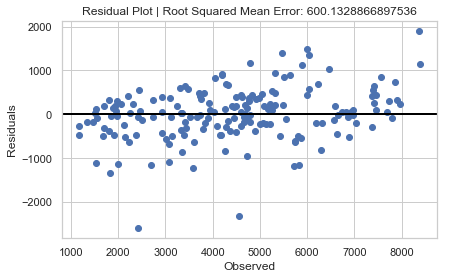

RMSE Value For Tuned Random Forest:  600.1328866897536
R^2: 0.8880652464338447


In [90]:
y_pred = clf.predict(X_test)

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Error: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
plt.show()
print ("RMSE Value For Tuned Random Forest: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: {}".format(clf.score(X_test, y_test))) 

#RMSE Value for tuned GBR: 600.13

In [40]:
from xgboost.sklearn import XGBRegressor
xgr = xg.XGBRegressor(random_state=42)
xgr.fit(X_train,y_train)
y_pred=(xgr.predict(X_test))
print("R^2: {}".format(xgr.score(X_test, y_test)))
print ("RMSE Value for XGBR: ",np.sqrt(mean_squared_error((y_pred), y_test)))

#RMSE Value for XGBR:  625.02

R^2: 0.8785876272188974
RMSE Value for XGBR:  625.0236143065551


In [41]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'holiday_1', 'weathersit_2', 'weathersit_3', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'yr_1', 'isweekend_1', 'workingday_1'],
      dtype='object')

In [114]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import time
def score(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm_model = xg.train(params, 
                              dtrain, 
                              num_round,
                              evals=watchlist,
                              verbose_eval=False)
    predictions = gbm_model.predict(dvalid, ntree_limit=gbm_model.best_iteration)
    #print(gini_normalized(y_test, np.array(predictions)))
    loss = np.sqrt(mean_squared_error(y_test, np.array(predictions)))
    return {'loss': loss, 'status': STATUS_OK}
 
def optimize(evals, cores, trials, optimizer=tpe.suggest, random_state=0):
    space = {
        'n_estimators': hp.quniform('n_estimators', 200, 600, 100),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 8, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'nthread': cores,
        'booster': 'gbtree',
        'seed': random_state
    }
    best = fmin(score, space, algo=tpe.suggest, max_evals=evals, trials = trials)
    return best
    

trials = Trials()
cores = 32
n= 1000
start = time.time()
best_param = optimize(evals = n,
                      optimizer=tpe.suggest,
                      cores = cores,
                      trials = trials)
print("------------------------------------")
print("The best hyperparameters are: ", "\n")
print(best_param)
end = time.time()
print('Time elapsed to optimize {0} executions: {1}'.format(n,end - start))

100%|████████████████████████████████████████████████| 1000/1000 [21:23<00:00,  2.01s/it, best loss: 583.6293579462645]
------------------------------------
The best hyperparameters are:  

{'alpha': 3.0, 'colsample_bytree': 0.7000000000000001, 'eta': 0.025, 'gamma': 0.55, 'max_depth': 6, 'min_child_weight': 6.0, 'n_estimators': 400.0, 'subsample': 0.9500000000000001}
Time elapsed to optimize 1000 executions: 1283.9775204658508


In [42]:
xgrtuned = xg.XGBRegressor(random_state=42,alpha=3,colsample_bytree=0.7,eta=0.025,max_depth=6,min_child_weight=6,n_estimators=400,
                     subsample=0.95,gamma=0.55)
xgrtuned.fit(X_train,y_train)
y_pred=(xgrtuned.predict(X_test))
print("R^2: {}".format(xgrtuned.score(X_test, y_test)))
print ("RMSE Value for XGBR: ",np.sqrt(mean_squared_error((y_pred), y_test)))

#RMSE Value for XGBR:  615.854

R^2: 0.8821235952004468
RMSE Value for XGBR:  615.8548888631393


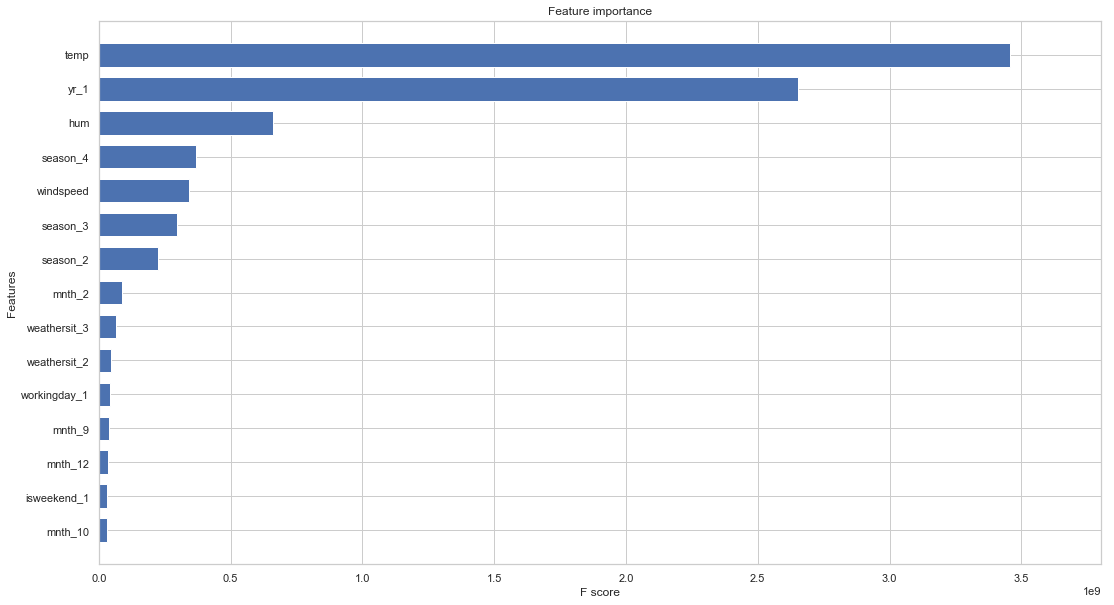

In [43]:
fig, ax = plt.subplots(figsize=(16, 10))
xg.plot_importance(xgrtuned, ax=ax, height=0.7,max_num_features=15,importance_type='total_gain',show_values=False)

In [44]:
for var in categoricalFeatureNames:
    bike_df[var] = bike_df[var].astype("str")

In [45]:
X=bike_df.drop(['cnt'],axis=1)
y=bike_df['cnt'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6, 10], dtype=int64)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 383 to 112
Data columns (total 11 columns):
season        529 non-null object
yr            529 non-null object
mnth          529 non-null object
holiday       529 non-null object
weekday       529 non-null object
workingday    529 non-null object
weathersit    529 non-null object
temp          529 non-null float64
hum           529 non-null float64
windspeed     529 non-null float64
isweekend     529 non-null object
dtypes: float64(3), object(8)
memory usage: 49.6+ KB


In [49]:
X_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'isweekend'],
      dtype='object')

In [50]:
m=CatBoostRegressor(random_state=1994,eval_metric='RMSE',
                     cat_features=categorical_features_indices,
                     use_best_model=True,nan_mode='Max')
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=150,verbose=100)
#bestTest = 594.490

0:	learn: 4822.7160653	test: 4822.7160653	test1: 4655.5097295	best: 4655.5097295 (0)	total: 92.2ms	remaining: 1m 32s
100:	learn: 823.5598069	test: 806.2617207	test1: 769.4893964	best: 769.4893964 (100)	total: 3.52s	remaining: 31.3s
200:	learn: 662.5264678	test: 659.4933483	test1: 660.5373553	best: 660.5373553 (200)	total: 6.47s	remaining: 25.7s
300:	learn: 603.2145753	test: 607.7095614	test1: 630.5013767	best: 630.5013767 (300)	total: 9.65s	remaining: 22.4s
400:	learn: 560.8138342	test: 572.3073387	test1: 617.1608013	best: 617.1608013 (400)	total: 13.8s	remaining: 20.7s
500:	learn: 531.7868866	test: 550.0915424	test1: 611.8005777	best: 611.7386268 (490)	total: 18.3s	remaining: 18.2s
600:	learn: 508.5902098	test: 530.9498492	test1: 608.0122724	best: 607.9733266 (597)	total: 22.6s	remaining: 15s
700:	learn: 490.7255947	test: 517.2838311	test1: 603.1316695	best: 602.9811771 (698)	total: 27s	remaining: 11.5s
800:	learn: 477.9699270	test: 507.4301575	test1: 598.7074347	best: 598.7074347 (80

In [174]:
import hyperopt 
from catboost import cv,Pool

def hyperopt_objective(params):
    model = CatBoostRegressor(
        n_estimators=int(params['n_estimators']),
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        rsm=params['rsm'],
        depth=params['depth'],
        bagging_temperature=params['bagging_temperature'],
        eval_metric='RMSE',
        random_seed=42,
        logging_level='Silent'
    )
    
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-RMSE-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [175]:
space ={
        'n_estimators': hp.quniform('n_estimators', 1400, 2400, 100),
        'depth': hyperopt.hp.quniform("depth", 4, 8, 1),
        'rsm': hyperopt.hp.uniform ('rsm', 0.6, 1.0),
        'learning_rate': hyperopt.hp.loguniform('learning_rate', -3.0, -0.7),
        'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 1, 20),
        'bagging_temperature': hyperopt.hp.uniform ('bagging_temperature', 0.6, 1.0)

       }


trials = hyperopt.Trials()
best = hyperopt.fmin(fn=hyperopt_objective,
                     space=space,
                     algo=hyperopt.tpe.suggest,
                     max_evals=10,
                     trials=trials,
                     verbose=100)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')

100%|████████████████████████████████████████████████| 10/10 [1:01:48<00:00, 346.99s/it, best loss: -4731.202377496392]
--------------------------------------------------
The best params:
{'bagging_temperature': 0.6408937229643316, 'depth': 6.0, 'l2_leaf_reg': 16.65266110918921, 'learning_rate': 0.05117504823550177, 'n_estimators': 1900.0, 'rsm': 0.6184516493950643}





In [51]:
m=CatBoostRegressor(n_estimators=1900,random_state=1994,eval_metric='RMSE',max_depth=6,learning_rate= 0.051,
                     l2_leaf_reg=16.652,bagging_temperature=0.640,
                     cat_features=categorical_features_indices,
                     use_best_model=True,rsm=0.618,
                     nan_mode='Max')
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=150,verbose=100)
#bestTest = 592.37

0:	learn: 4750.7645402	test: 4750.7645402	test1: 4577.2510030	best: 4577.2510030 (0)	total: 25.5ms	remaining: 48.4s
100:	learn: 774.6298436	test: 758.2606532	test1: 720.6456549	best: 720.6456549 (100)	total: 2.77s	remaining: 49.3s
200:	learn: 656.0258012	test: 646.0445388	test1: 652.3131243	best: 652.3131243 (200)	total: 5.52s	remaining: 46.7s
300:	learn: 593.3101901	test: 588.8368554	test1: 625.6819315	best: 625.6819315 (300)	total: 9.38s	remaining: 49.8s
400:	learn: 562.0645194	test: 562.1699795	test1: 618.9021231	best: 618.7777749 (398)	total: 13.4s	remaining: 50s
500:	learn: 540.4079796	test: 542.3767845	test1: 610.9570238	best: 610.9295637 (492)	total: 17.2s	remaining: 48.1s
600:	learn: 518.2094720	test: 525.0822251	test1: 607.3214991	best: 606.8158176 (581)	total: 21.5s	remaining: 46.4s
700:	learn: 502.1307455	test: 513.4748524	test1: 605.8193208	best: 605.6805641 (671)	total: 25.9s	remaining: 44.3s
800:	learn: 488.3462037	test: 504.8741226	test1: 603.7889160	best: 603.6564443 (7

In [52]:
y_pred=m.predict(X_test)
print ("RMSE Value for Tuned Catboost: ",np.sqrt(mean_squared_error((y_pred), y_test)))

RMSE Value for Tuned Catboost:  592.3709564385579


Dataset is provided, but PredictionValuesChange feature importance don't use it, since non-empty LeafWeights in model.


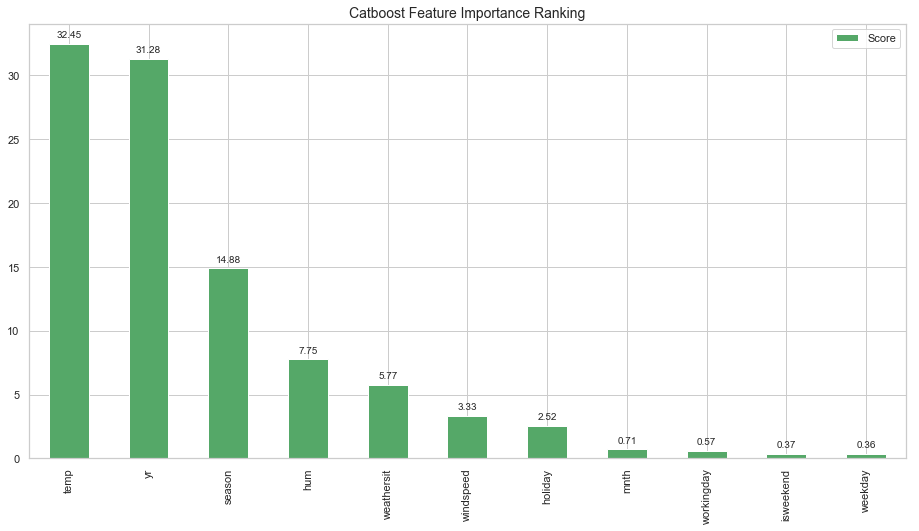

In [53]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, m.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
plt.rcParams["figure.figsize"] = (14,8)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='g')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [54]:
bike_df.to_csv('clean_df.csv',index=False)

In [55]:
y_pred=m.predict(X_test)
result=pd.DataFrame(data=y_pred)
yval=pd.DataFrame(y_test)
testdata = pd.concat([yval,result], axis=1, join_axes=[result.index])
testdata.columns=['cnt','predicted_count']

In [56]:
testdata.head(5)

,cnt,predicted_count
0,4717,5710.041359
1,2252,2285.302599
2,1693,1862.739348
3,3785,4196.495702
4,3071,4177.796548


In [57]:
merged_Frame = pd.merge(bike_df_copy,testdata, on ='cnt',how='inner')

In [58]:
#sample file with input and predicted output
merged_Frame.to_csv('predictions_final.csv',index=False)

## Implementing H2O

In [407]:
import sys
import h2o
from h2o.automl import H2OAutoML

In [408]:
#connect to a pre-existing cluster
h2o.init()
df=h2o.import_file(path="C:/Users/kiran/Desktop/python practice/bike rental/clean_df.csv")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from C:\Users\kiran\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kiran\AppData\Local\Temp\tmp7xpznno1
  JVM stdout: C:\Users\kiran\AppData\Local\Temp\tmp7xpznno1\h2o_kiran_started_from_python.out
  JVM stderr: C:\Users\kiran\AppData\Local\Temp\tmp7xpznno1\h2o_kiran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,16 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_kiran_yp0znr
H2O cluster total nodes:,1
H2O cluster free memory:,1.302 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [409]:
df.describe()

Rows:706
Cols:12




,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,isweekend
type,int,int,int,int,int,int,int,real,real,real,int,int
mins,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0965217,0.275833,0.0223917,441.0,0.0
mean,2.5056657223796037,0.5,6.56515580736544,0.029745042492917848,2.9815864022662883,0.6869688385269122,1.3937677053824353,0.4984316841359774,0.6313443470254958,0.1889913130311615,4528.702549575069,0.28328611898017
maxs,4.0,1.0,12.0,1.0,6.0,1.0,3.0,0.861667,0.9625,0.441563,8555.0,1.0
sigma,1.1060615305563108,0.5003544842699803,3.433564579321391,0.17000356319857227,1.9988509547568991,0.46405568465455665,0.5386252238600353,0.18260143099736054,0.13340107385302571,0.07611622686292267,1886.1678052103252,0.4509136134717338
zeros,0,353,0,685,102,221,0,0,0,0,0,506
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.805833,0.160446,985.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.696087,0.248539,801.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.437273,0.248309,1349.0,0.0


In [410]:
x = df.columns
y = "cnt"

dropFeatures = ['cnt']
for a in dropFeatures:
    x.remove(a)

In [411]:
train,valid = df.split_frame(ratios = [.75], seed = 1234)

In [412]:
valid.shape

(171, 12)

In [413]:
code_cols = ["season","holiday","weathersit","weekday","mnth","yr",'isweekend']


for col in code_cols:
    train[col] = train[col].asfactor()


for col in code_cols:
    valid[col] = valid[col].asfactor()


    
aml = H2OAutoML(max_models=25, seed=42,max_runtime_secs=7200,project_name="Bike_Rental_ensemble",max_runtime_secs_per_model=400)
aml.train(x=x, y=y, training_frame=train, validation_frame = valid)



aml.leaderboard



h2o.save_model(aml.leader, path = "Best_AutoBike_v1")



preds=aml.leader.predict(valid)



AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [418]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190524_043526,389001,623.699,389001,444.814,0.198217
GBM_3_AutoML_20190524_043526,419010,647.31,419010,459.736,0.211947
GBM_2_AutoML_20190524_043526,420804,648.694,420804,458.736,0.211599
GBM_4_AutoML_20190524_043526,424605,651.617,424605,468.075,0.21236
GBM_grid_1_AutoML_20190524_043526_model_5,432218,657.433,432218,470.426,0.210234
GBM_1_AutoML_20190524_043526,438677,662.327,438677,474.712,0.214385
GBM_grid_1_AutoML_20190524_043526_model_6,461083,679.031,461083,490.971,0.214597
DRF_1_AutoML_20190524_043526,521344,722.042,521344,527.95,0.242903
DeepLearning_grid_1_AutoML_20190524_043526_model_2,524893,724.495,524893,552.576,0.257022
XRT_1_AutoML_20190524_043526,526798,725.809,526798,546.617,0.239866


In [419]:
aml.leader  #RMSE: 616.646

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190524_043526
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 99465.97328051347
RMSE: 315.38226532339047
MAE: 228.19491476031186
RMSLE: 0.1030786357631
R^2: 0.9715726009283274
Mean Residual Deviance: 99465.97328051347
Null degrees of freedom: 534
Residual degrees of freedom: 514
Null deviance: 1871936844.130839
Residual deviance: 53214295.705074705
AIC: 7718.814655383722

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 380252.84403269505
RMSE: 616.6464497852031
MAE: 396.3791757018807
RMSLE: 0.21484543356448288
R^2: 0.8973444556109134
Mean Residual Deviance: 380252.84403269505
Null degrees of freedom: 170
Residual degrees of freedom: 150
Null deviance: 637080078.2236
Residual deviance: 65023236.32959085
AIC: 2726.3861572552814

ModelMetricsRegressionGLM: stackedensemble
** Reporte